In [2]:
from matplotlib.pylab import plt
import  numpy as np
import json
from scipy import stats
import glob

import sys
sys.path.append('/nfs3-p1/zhangtl/utils/')
from util import myout

In [3]:
def get_id_max(nums):
    idd = np.argmax(nums)
    return idd, nums[idd]

def metric_by(nums, name='mrr'):
    valid_idd, valid_max = get_id_max(nums[:, 1])
    test_idd, test_max = get_id_max(nums[:, 2])
    test_val = nums[:, 2][valid_idd]
    print(f'{name}: valid_max is {valid_max} at epoch {valid_idd}(test = {test_val}), test_max is {test_max} at epoch {test_idd}')
    return valid_max, test_max, nums[:, 2][valid_idd]

In [48]:
mpaths = glob.glob('../log/**')
mpaths

['../log/01.03-20:49_uci_egcn_cat.log',
 '../log/01.03-21:18_uci_egcn_tim_cat.log',
 '../log/01.04-00:17_bca_egcn_cat.log',
 '../log/01.04-08:02_bca_egcn_tim_cat.log',
 '../log/01.04-19:58_bco_egcn_tim_cat.log']

In [45]:
# mpath = '../log/log_bitcoinalpha_link_pred_stgsn_20221229134012_r0.log'
# mpath = '../log/01.03-20:49_uci_egcn_cat.log'
# mpath = '../log/01.03-21:18_uci_egcn_tim_cat.log'
mpath = mpaths[2]
fr = open(mpath, 'rb')
lines = fr.readlines()
fr.close()
len(lines)

117

In [46]:
mrrs = []
maps = []
aucs = []
for line in lines:
    line = line.decode('utf-8').strip()
    if line.startswith('INFO:root:epoch'):
        mrrs.append(np.array([float(item.split(', ')[0][0:-1]) for item in line.split("'MRR': ")[1:]]))
        maps.append(np.array([float(item.split(', ')[0][0:-1]) for item in line.split("'MAP': ")[1:]]))
        aucs.append(np.array([float(item.split(', ')[0][0:-1]) for item in line.split("'AUC': ")[1:]]))
mrr = np.vstack(mrrs)
map = np.vstack(maps)
auc = np.vstack(aucs)
print(mrr.shape, map.shape, auc.shape)

(50, 3) (50, 3) (50, 3)


In [47]:
print(mpath)
a = metric_by(mrr)
b = metric_by(map, 'map')
c = metric_by(auc, 'auc')

../log/01.04-11:32_bca_gcn_lstm_cat.log
mrr: valid_max is 10.231 at epoch 0(test = 18.505), test_max is 18.505 at epoch 0
map: valid_max is 0.257 at epoch 3(test = 0.33), test_max is 0.427 at epoch 5
auc: valid_max is 95.37 at epoch 1(test = 96.086), test_max is 96.086 at epoch 1


In [17]:
a = np.zeros((2, 3))
a[0, 0] = stats.pearsonr(mrr[:, 1], map[:, 1])[0]
a[0, 1] = stats.pearsonr(mrr[:, 1], auc[:, 1])[0]
a[0, 2] = stats.pearsonr(map[:, 1], auc[:, 1])[0]
a[1, 0] = stats.pearsonr(mrr[:, 2], map[:, 2])[0]
a[1, 1] = stats.pearsonr(mrr[:, 2], auc[:, 2])[0]
a[1, 2] = stats.pearsonr(map[:, 2], auc[:, 2])[0]
a, a.mean()

(array([[0.84347163, 0.94098935, 0.88261667],
        [0.87295523, 0.98288793, 0.84730775]]),
 0.895038094304355)

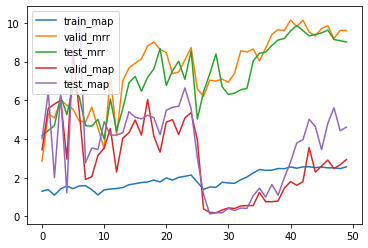

In [79]:
xx = np.arange(len(mrr))
plt.figure()
plt.plot(xx, map[:, 0])
plt.plot(xx, mrr[:, 1])
plt.plot(xx, mrr[:, 2])
plt.plot(xx, map[:, 1]*10)
plt.plot(xx, map[:, 2]*10)
plt.legend(['train_map', 'valid_mrr', 'test_mrr', 'valid_map', 'test_map'])
plt.show()

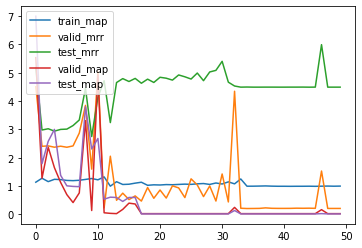

In [60]:
xx = np.arange(len(mrr))
plt.figure()
plt.plot(xx, map[:, 0])
plt.plot(xx, mrr[:, 1])
plt.plot(xx, mrr[:, 2])
plt.plot(xx, map[:, 1]*10)
plt.plot(xx, map[:, 2]*10)
plt.legend(['train_map', 'valid_mrr', 'test_mrr', 'valid_map', 'test_map'])
plt.show()

## old

In [4]:
cnt = [0,0,0]
epochs= [[],[],[]]
mrrs = [[],[],[]]
maps = [[],[],[]]
flag = -1
for line in lines:
    line = str(line).strip()
    if 'TRAIN epoch' in line:
        cnt[0] += 1
        flag = 0
        epoch = int(line.split()[3])
        epochs[0].append(epoch)
    elif 'VALID epoch' in line:
        cnt[1] += 1
        flag = 1
        epoch = int(line.split()[3])
        epochs[1].append(epoch)
    elif 'TEST epoch' in line:
        cnt[2] += 1
        flag = 2
        epoch = int(line.split()[3])
        epochs[2].append(epoch)
    
    for tt in range(0,3):
        if flag == tt and 'mean MRR' in line:
            mrr = float(line.split()[3])
            map = float(line.split()[-1][0:-3])
            mrrs[flag].append(mrr)
            maps[flag].append(map)
            
print(f'valid mrr: {max(mrrs[1])}, map: {max(maps[1])}, Test mrr: {max(mrrs[2])}, map: {max(maps[2])}')

valid mrr: 0.08388542965134842, map: 0.0037262362024920496, Test mrr: 0.13810311249631427, map: 0.00205669439225131


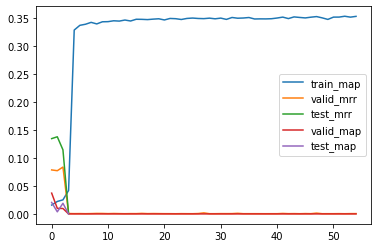

In [5]:
plt.figure()
plt.plot(epochs[0], maps[0])
plt.plot(epochs[1][0:len(mrrs[1])], mrrs[1])
plt.plot(epochs[2], mrrs[2])
plt.plot(epochs[1][0:len(mrrs[1])], np.array(maps[1])*10)
plt.plot(epochs[2], np.array(maps[2])*10)
plt.legend(['train_map', 'valid_mrr', 'test_mrr', 'valid_map', 'test_map'])
plt.show()

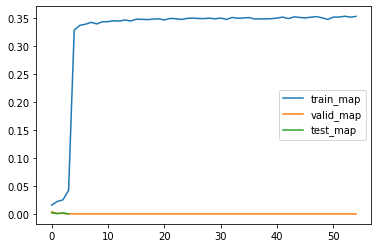

In [8]:
plt.figure()
plt.plot(epochs[0], maps[0])
# plt.plot(epochs[1][0:len(mrrs[1])], mrrs[1])
# plt.plot(epochs[2], mrrs[2])
plt.plot(epochs[1][0:len(mrrs[1])], np.array(maps[1]))
plt.plot(epochs[2], np.array(maps[2]))
plt.legend(['train_map', 'valid_map', 'test_map'])
plt.show()